In [9]:
%%time
import seaborn as sns
import numpy as np
import time

# считываем файл входной 
inp=np.genfromtxt('E:\mphti\hack\input_with_weights.csv', delimiter=',')
# определяем матрицу совместности
comp_mat=inp[:28,:]
# определяем веса траекторных гипотез
wgh=inp[28:29,:]

# переведем матрицу совместимости в матирцу совместимости весов
comp_wgh=comp_mat*wgh

# как предложение: 1) выбираем порог и значения больще оставляем , а меньше зануляем. Тем самым делаем матрицу совместимости
#                     более  разреженной. Это позволит оптимальнее делать проход а не перебирать все подряд

def mean_tr(matrix):
    # проходим по каждой строке матрицы
    for i in range (0,len(matrix)):
        # считаем среднее относительно возможных для дальнейшего следования траекторий 
        threshold=np.mean(comp_wgh[i][int(i+1):])
        # выделяем отрезок на котором будем проводить сравнение с порогом
        matrix[i]=[matrix[i][j] if matrix[i][j]>threshold else 0 for j in range(0,len(matrix[0]))]
    
    return matrix

new=mean_tr(comp_wgh)

CPU times: total: 0 ns
Wall time: 1.99 ms


c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot: >

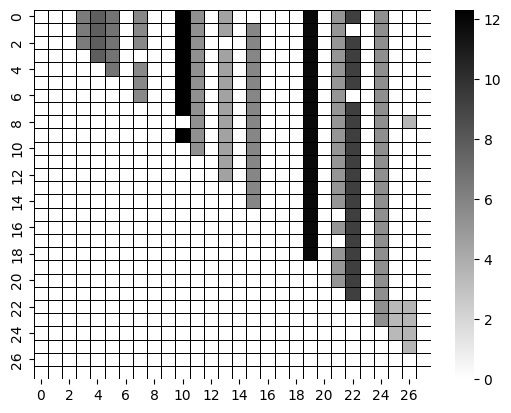

In [28]:
import seaborn as sns

sns.heatmap(comp_wgh,cmap='binary',linewidths=0.5,linecolor='black')

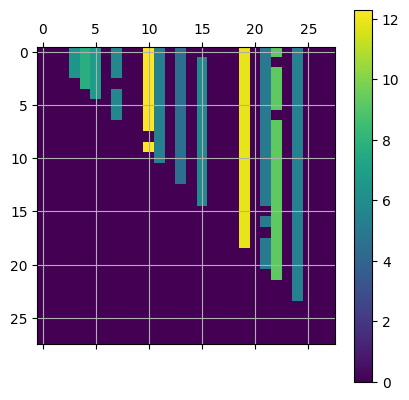

In [87]:

def zerofy_below_threshold(matrix, threshold):
    result = matrix.copy()
    result[result < threshold] = 0
    return result

# Пример использования функции

result_matrix = zerofy_below_threshold(comp_wgh, threshold)
plt.matshow(result_matrix)
plt.grid()
plt.colorbar()

вот приметно както так она и выглядит

представим в юолее удобном виде